In [2]:
%matplotlib inline
from pprint import pprint

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3]:
RAND_SEED = 42
np.random.seed(RAND_SEED)


In [4]:
df_house = pd.read_csv("DATA1_housing.csv")

In [5]:
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Analize exploratória

In [6]:
df_house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [7]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df=df_house[df_house["median_house_value"].notna()]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [10]:
df.corr()["median_house_value"].sort_values(ascending=False).drop("median_house_value")

median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [15]:
# Retirando households, pois além de apresentar uma correlação baixa, qualitativamente não faz diferença no preço da casa.
df=df.loc[:,['latitude','longitude','population','total_bedrooms','housing_median_age','total_rooms','median_income','median_house_value']]

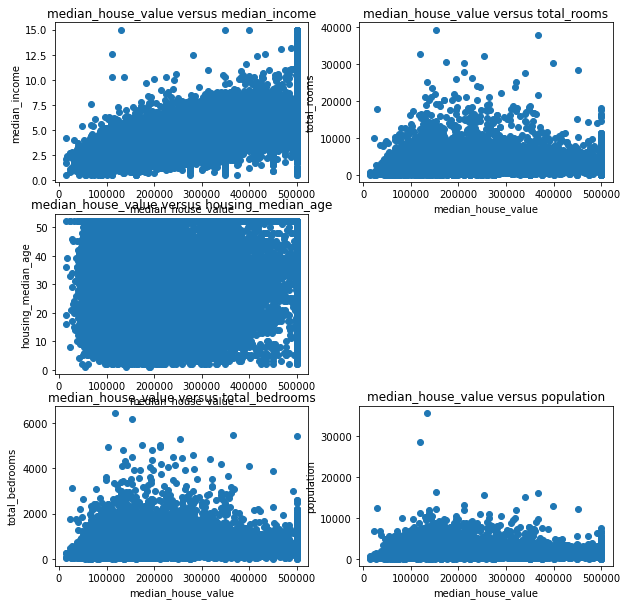

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(3, 2, 1)
plt.scatter(df["median_house_value"],df["median_income"])
plt.title('median_house_value versus median_income')
plt.xlabel('median_house_value')
plt.ylabel('median_income')

plt.subplot(3,2,2)
plt.scatter(df["median_house_value"],df["total_rooms"])
plt.title('median_house_value versus total_rooms')
plt.xlabel('median_house_value')
plt.ylabel('total_rooms')

plt.subplot(3,2,3)
plt.scatter(df["median_house_value"],df["housing_median_age"])
plt.title('median_house_value versus housing_median_age')
plt.xlabel('median_house_value')
plt.ylabel('housing_median_age')

#modificando, pois tirei o households
#plt.subplot(3,2,4)
#plt.scatter(df["median_house_value"],df["households"])
#plt.title('median_house_value versus households')
#plt.xlabel('median_house_value')
#plt.ylabel('households')

plt.subplot(3,2,5)
plt.scatter(df["median_house_value"],df["total_bedrooms"])
plt.title('median_house_value versus total_bedrooms')
plt.xlabel('median_house_value')
plt.ylabel('total_bedrooms')

plt.subplot(3,2,6)
plt.scatter(df["median_house_value"],df["population"])
plt.title('median_house_value versus population')
plt.xlabel('median_house_value')
plt.ylabel('population')
plt.show()

TypeError: xlabel() missing 1 required positional argument: 'xlabel'

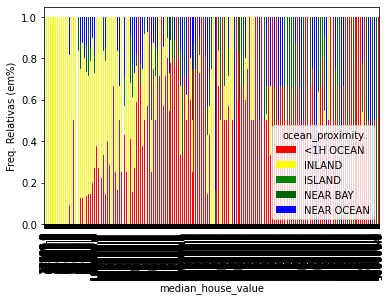

In [12]:
median_x_ocean_proximity=pd.crosstab(df['median_house_value'], df["ocean_proximity"], normalize='index',margins=True).round(4)
cores = ['red','yellow','green','darkgreen','blue','purple','pink','orange']
median_x_ocean_proximity.plot.bar(color=cores, stacked=True)

plt.ylabel("Freq. Relativas (em%)")
plt.xlabel()

In [18]:
BINS=int(np.sqrt(len(df.index)))

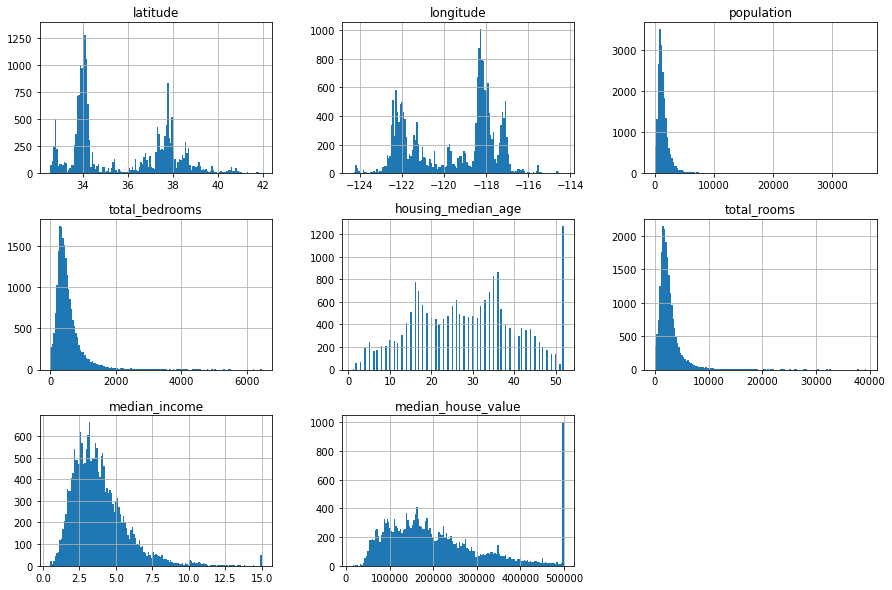

In [19]:
df.hist(bins=BINS, figsize=(15,10));

<AxesSubplot:ylabel='Frequency'>

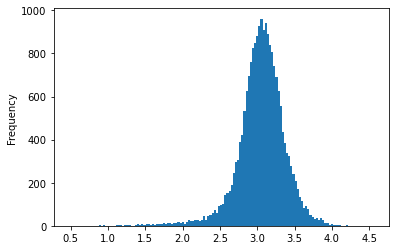

In [20]:
df["population"].apply(np.log10).plot.hist(bins = BINS)

# Análise

# Manipulação de Dados

# Separação Treino e Teste

# Aplicando Modelos